## Введение в анализ данных, ИАД-6

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): Пучкова Арина

### Общая информация

__Дата выдачи:__ 06.02.2020

__Дедлайн:__ 17.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$, $s_{\text{pandas}}$ и $s_{\text{matplotlib}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждые 2 задачи сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) идет балл в бонус. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл от оценки в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

Необходимое, но не достаточное условие для успешного выполнения этой части — вам необходимо пройти все `assert`'ы.

In [36]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес проверочных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [37]:
def result_mark(weights: np.array, marks: np.array) -> int:
    out = weights*marks
    res = np.round_((sum(out)), decimals = 0)
    return (int(res))

In [38]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [39]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, которая принимает на вход два целочисленных массива одинаковой длины, и возвращает минимальный и максимальный из тех элементов этих двух массивов у которых совпадает и позиция и значение (то есть из всех элементов $\{a[i]: a[i] = b[i]\}$). Например, для `a = np.array([4, 2, 6, 3])` и `b = np.array([4, 3, 6, -3])` ответом является кортеж `(4, 6)`.

In [40]:
def minMaxEqual(a: np.array, b: np.array) -> tuple:
    out = a - b
    res = a[out == 0]
    maxx = res[res.argmax()]
    minn = res[res.argmin()]
    return (minn, maxx)

In [41]:
a = np.array([4, 2, 6, 3])
b = np.array([4, 3, 6, -3])

assert minMaxEqual(a, b) == (4, 6)

In [42]:
a = np.array([0, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 0])

assert minMaxEqual(a, b) == (0, 0)

In [43]:
a = np.array([-1, -1, -1, 1, 0])
b = np.array([1, -1, 1, 1, 0])

assert minMaxEqual(a, b) == (-1, 1)

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [44]:
def find_close(array1: np.array, array2: np.array, precision: float) -> np.array:
    out = abs(array1 - array2)
    inx = np.arange(0, len(array1))
    res = inx[out <= precision]
    return res

In [45]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [46]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [47]:
def block_matrix(block: np.array) -> np.array:
    one = np.hstack((block, block))
    two = np.vstack((one, one))
    return two

In [48]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [49]:
def diag_prod(matrix: np.array):
    d = matrix.diagonal()
    no_zero = d[d != 0]
    return np.prod(no_zero)

In [50]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [51]:
np.set_printoptions(suppress = True)
def normalize(matrix: np.array) -> np.array:
    res = matrix - matrix.mean(axis = 0)
    stds = matrix.std(axis = 0)
    stds[stds == 0] = 1
    res = res/stds 
    return res

In [52]:
matrix = np.array([[0, 4, 4200], [0, 10, 5000], [0, 2, 1000]])
normalize(matrix)

array([[ 0.        , -0.39223227,  0.46291005],
       [ 0.        ,  1.37281295,  0.9258201 ],
       [ 0.        , -0.98058068, -1.38873015]])

In [53]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [54]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [55]:
def make_symmetric(matrix: np.array) -> np.array:
    return matrix + matrix.T - np.diag(np.diagonal(matrix))

In [56]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [57]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 8

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [58]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    line = np.arange(a, b+1)
    my_tuple = (line,) * m 
    res = np.vstack(my_tuple)
    return res

In [59]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [60]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 9

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [61]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    chis = sum(vec1*vec2)
    z_vec1 = sum(vec1 ** 2)
    z_vec2 = sum(vec2 ** 2)
    res = chis / (np.sqrt(z_vec1) * np.sqrt(z_vec2))
    return res

In [62]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [63]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

### 10

Напишите функцию, которая принимает параметры `lims: ndarray размера 2`, `k: float`, `b: float`, `n: int`, `noise_level: float` и возвращает выборку из n объектов, сгенерированную по правилу `y_i = k*x_i + b + U[-noise_level; noise_level]`. Где каждый x_i генерируется равномерно из `U[lims[0]; lims[1]]` (U[a, b] — равномерное распределение на [a, b]). Функция должна возвращать кортеж, первым элементом которого будет массив x, и вторым элементом массив y — значения функции в точках этого массива.

In [64]:
def gen_data(lims: np.array, k: float, b: int, n: int, noise_level: float):
    np.random.seed(123)
    xs = np.random.uniform(lims[0],lims[1], n)
    ys = k*xs + b + np.random.uniform(-noise_level, noise_level, n)
    return (xs, ys)

In [65]:
gen_data((-1, 1), 2, 0, 20,  1e-1)

(array([ 0.39293837, -0.42772133, -0.54629709,  0.10262954,  0.43893794,
        -0.15378708,  0.9615284 ,  0.36965948, -0.0381362 , -0.21576496,
        -0.31364397,  0.45809941, -0.12285551, -0.88064421, -0.20391149,
         0.47599081, -0.63501654, -0.64909649,  0.06310275,  0.06365517]),
 array([ 0.81275693, -0.7855563 , -1.04770312,  0.22746378,  0.92236456,
        -0.34298238,  1.89541452,  0.6849716 , -0.11752958, -0.4053347 ,
        -0.70886695,  0.90293906, -0.25953847, -1.76255139, -0.42265692,
         0.91443387, -1.28476282, -1.21951514,  0.2150375 ,  0.12767768]))

In [66]:
# Выход должен выглядеть примерно так

gen_data((-1, 1), 2, 0, 20,  1e-1)

(array([ 0.39293837, -0.42772133, -0.54629709,  0.10262954,  0.43893794,
        -0.15378708,  0.9615284 ,  0.36965948, -0.0381362 , -0.21576496,
        -0.31364397,  0.45809941, -0.12285551, -0.88064421, -0.20391149,
         0.47599081, -0.63501654, -0.64909649,  0.06310275,  0.06365517]),
 array([ 0.81275693, -0.7855563 , -1.04770312,  0.22746378,  0.92236456,
        -0.34298238,  1.89541452,  0.6849716 , -0.11752958, -0.4053347 ,
        -0.70886695,  0.90293906, -0.25953847, -1.76255139, -0.42265692,
         0.91443387, -1.28476282, -1.21951514,  0.2150375 ,  0.12767768]))

## Часть 2. Pandas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [3]:
data = pd.read_csv('train.csv')
data.shape 

(891, 12)

Размер таблицы: 891 строка, 12 рядов

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

Задача регрессии: оценить, как на веротяность выжить влияют пол и класс билета, оценить, что из этого больше влияло на вероятность выживания, можно посмотреть на interaction между независимыми переменными: больше вероятность выжить у женщины со вторым классом билета или у мужчины с третьим, например? Задача классификации: прогноз выживет или нет пассажир, на основе данных о его/ее возрасте и стоимости билета, оценка точности предсказаний классификатора. Задача кластеризации: распределение возраста выживших пассажиров по полу и классу билета

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId – вещественный  
Survived - категориальный  
Pclass - порядковый  
Name - другое (текстовый)  
Sex - категориальный         
Age - вещественный         
SibSp - вещественный
Parch - вещественный   
Ticket - другое
Fare - вещественный  
Cabin  - другое
Embarked - категориальный

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [7]:
data['Survived'].mean() 

0.3838383838383838

Доля выживших – 38% 

In [8]:
data.groupby("Sex")["Survived"].mean() 

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Доля мужчин среди выживших – 0.19, доля женщин – 0.74

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [9]:
data["Pclass"].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

216 человек в 1 классе, 184 – во втором, 491 – в третьем

In [10]:
data.groupby("Sex")["Pclass"].value_counts() 

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

В третьем классе ехало больше мужчин, чем женщин: 347 против 144 

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [77]:
data["Fare"].max()

512.3292

In [78]:
data["Fare"].min()

0.0

In [79]:
data["Fare"].mean()

32.2042079685746

In [80]:
data[(data.Embarked == "S")].Fare.min()

0.0

In [81]:
data[(data.Embarked == "S")].Fare.max()

263.0

In [82]:
data[(data.Embarked == "S")].Fare.mean()

27.07981180124218

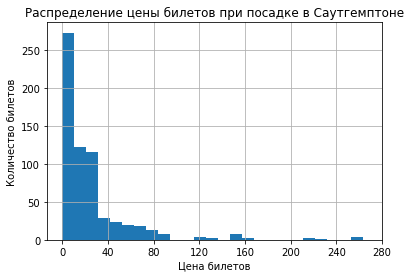

In [83]:
pt = data[(data.Embarked == "S")].Fare.hist(bins = 25)
plt.title("Распределение цены билетов при посадке в Саутгемптоне")
plt.xlabel("Цена билетов")
plt.ylabel("Количество билетов")
plt.xticks(np.arange(0, 300, 40))
plt.show()

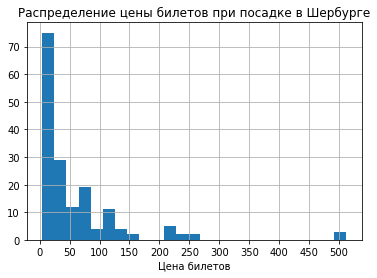

In [84]:
pt = data[(data.Embarked == "C")].Fare.hist(bins = 25)
pt.set_title("Распределение цены билетов при посадке в Шербурге")
pt.set_xlabel("Цена билетов")
plt.xticks(np.arange(0, 550, 50))
plt.show()

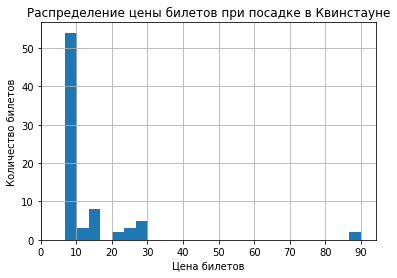

In [85]:
pt = data[(data.Embarked == "Q")].Fare.hist(bins = 25)
pt.set_title("Распределение цены билетов при посадке в Квинстауне")
pt.set_xlabel("Цена билетов")
pt.set_ylabel("Количество билетов")
plt.xticks(np.arange(0, 100, 10))
plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [86]:
data['Cabin'].nunique()

147

In [87]:
data['Ticket'].nunique()

681

In [88]:
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
data.drop('Ticket', axis=1, inplace=True)
data.drop('Cabin', axis=1, inplace=True)


Позиция кабины относительно планировки могла бы прояснить связь с вероятностью выживания, так как из некоторых кабин проще выбраться на 
палубу, чем из других. 
Но посколку перед нами нет планировки корабля, номер кабины и отсек сами по себе вряд ли нам что-то скажет
Тем более, значения Cabin хотя и повторяются, самих уникальных значений довольно много. Поэтому вряд ли эта переменная помогла бы нам 
при классификации, регресии или кластеризации
Еще возникают проблемы с тем, что из 891 налюдения, в 687 номер кабины не определен, то есть около 77% значений отсутствуют
Номер билета же вряд ли может влиять на какую-либо интересующую нас характеристику, тем более что он носит уникальный характер 
(повторения есть, но их сравнительно не много)
Имя пассажира и PassengerID тоже не несут содержательной информации, но могут быть полезны для идентификации и, 
в случае PassengerID, упорядочивания. Поэтому их было решено оставить

### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [90]:
pd.isnull(data).sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Да, пропуски есть. 177 в графе Age, 2 в графе Embarked

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [91]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

В графе Age имеет смысл заменить на средний возраст (если проставлять 0 вместо пропуска, это может создать выбросы). 
С учетом того, что пропущенных значений возраста относительно много, замена на 0 может, например, "сместить" оценку коэффициента при 
возрасте при оценке регресиии 
В графе Embarked имеет смысл заменить на "S", так как большая часть людей села на борт в Саутгемптоне (644 из 889 значений)

In [92]:
data["Age"].fillna(np.round(data.Age.mean(), decimals = 0), inplace = True)

In [93]:
data["Embarked"].fillna("S", inplace = True)

In [94]:
pd.isnull(data).sum() #пропусков нет

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [95]:
data["Age"].corr(data["Fare"]) 

0.09063187236620253

Корреляция составляет примерно 0,1, что очень мало, связь между факторами низкая 

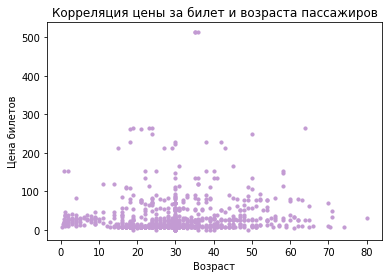

In [96]:
plt.scatter(data["Age"], data["Fare"], s=10, color='#C39BD3')
plt.title("Корреляция цены за билет и возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Цена билетов")
plt.show();

Точки оказываются расположены вдоль оси X (нет наклона), что подтверждает, что связи нет 

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса? А от места посадки?

In [97]:
data.groupby("Survived").Fare.mean() 

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

Среднее значение цены билеты у выживших пассажиров в 2 раза больше, чем у тех, кто погиб

In [98]:
data.groupby("Pclass")["Survived"].mean() 

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Как видно, пассажиры в 1-ом классе выживали чаще, чем пасссажиры в 2-ух остальных 
А пассажиры 2-ого класса вжимвали чаще, чем 1-ого

In [99]:
data.groupby("Embarked")["Survived"].mean() 

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

Пассажиры, севшие на судно в Шербурге, выживали чаще, чем те, что сели в Квинстауне и Саутгемптоне. 
Пассажиры, севшие в Квинстауне, выживали немного чаще, чем те, что сели в Шербурге

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [100]:
fam = data['SibSp'] + data["Parch"] + 1
data["Family"] = fam
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,2


In [101]:
def log_no_zero(x, minn = 1): 
    return np.log(np.clip(x, a_min = minn, a_max = None))

log_Fare = log_no_zero(data["Fare"])

Логарифм от цены может пригодиться, чтобы смаштабировать значения. У цен на билеты есть несколько выбросов. Логарифмирование может это сгладить

In [102]:
data["log(Fare)"] = log_Fare
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,log(Fare)
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,4.266662
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,2.070022
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,3.972177
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,2.085672
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,8.4583,Q,1,2.135148
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1,3.948596
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,5,3.048088
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3,2.409941
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,2,3.403555


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [103]:
def get_last_name(name):
    return name.split(',')[0].strip()

last_names = np.array(data['Name'].apply(get_last_name))
print(max(set(last_names), key = list(last_names).count))

Andersson


### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

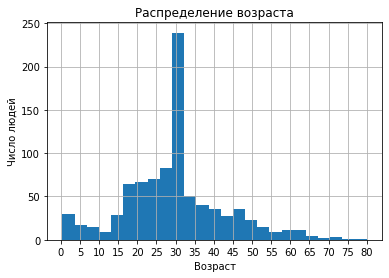

In [104]:
#Age - вещественный         
#SibSp - вещественный
#Parch - вещественный   
#Fare - вещественный 
#Family – вещественный 
#log(Fare) – вещественный
#PassengerID тоже вещественный, но значения идут по от 1 до 891, так что вряд ли есть смысл визуализировать 
data.Age.hist(bins = 25)
plt.title("Распределение возраста")
plt.xlabel("Возраст")
plt.ylabel("Число людей")
plt.xticks(np.arange(0, 85, 5))
plt.show()

Как видно, распределение возраста не имеет нормальный характер из-за слишком большого пика на среднем значении 
(возможно, из-за замены пропущенных значений), также виден небольшой пик с 0 до 10 лет, после 30 лет график начинает резко идти вниз


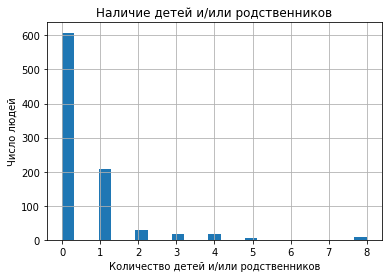

In [105]:
data.SibSp.hist(bins = 25)
plt.title("Наличие детей и/или родственников")
plt.xlabel("Количество детей и/или родственников")
plt.ylabel("Число людей")
plt.show()

#Похоже скорее на экспоненциальное распределение 

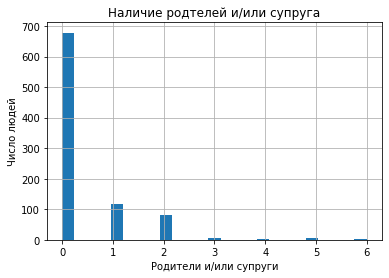

In [106]:
data.Parch.hist(bins = 25)
plt.title("Наличие родителей и/или супруга")
plt.xlabel("Родители и/или супруги")
plt.ylabel("Число людей")
plt.show()
#Также похоже на экспоненциальное распределение

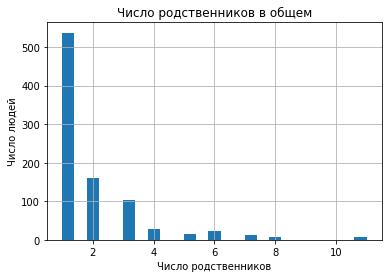

In [107]:
data.Family.hist(bins = 25)
plt.title("Число родственников в общем")
plt.xlabel("Число родственников")
plt.ylabel("Число людей")
plt.show()
#И это тоже скорее экспоненциальное распределение

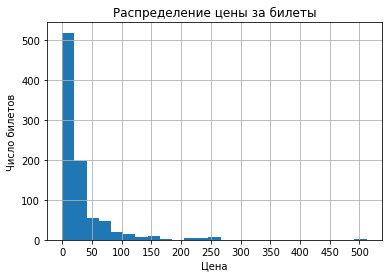

In [108]:
data.Fare.hist(bins = 25)
plt.title("Распределение цены за билеты")
plt.xlabel("Цена")
plt.ylabel("Число билетов")
plt.xticks(np.arange(0, 550, 50))
plt.show()

#сложно поверить, но и это скорее экспоненциальное распределение 

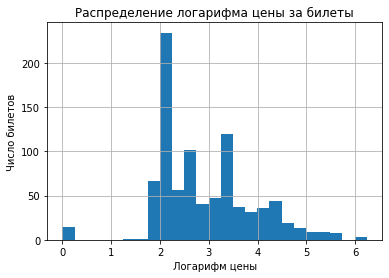

In [109]:
data["log(Fare)"].hist(bins = 25)
plt.title("Распределение логарифма цены за билеты")
plt.xlabel("Логарифм цены")
plt.ylabel("Число билетов")
plt.show() 


Как видно, логарифмирование цены за билет смогло "сгладить" выброс очень дорогих билетов (около 500 единиц), но создало проблему с 
нулевыми значениями, которые оказались "отделены" от остального графика. Так что нужно нормировать по-другому

Графики не похожи между собой – график возраста имеет иное распределение, по сравнению с остальными. Также у данных разный "масштаб"
Например, цена ранжируется от 0 до 500+, а количество детей и/или родственников (братьев и сестер) от 0 до 8 
Это можно создать проблемы, так как, например, при проведении регрессии параметр, который в целом имеет бОльшие значения, будет имет больший
коэффициент, "перетягивая" на себя вес других факторов. Кроме того, некоторые тесты не устойчивы к выборсам, которые тоже могут сместить 
наши оценки. В распределении цены мы видим несколько экстремальных значений около 500 единиц, нормировка может такие выбросы сгладить

In [130]:
def norm(factor): 
    return (factor - np.mean(factor)) / np.std(factor)
data["Age_n"] = norm(data["Age"])
data["SibSp_n"] = norm(data["SibSp"])
data["Parch_n"] = norm(data["Parch"])
data["Fare_n"] = norm(data["Fare"])
data["Family_n"] = norm(data["Family"])
 

In [131]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,log(Fare),Age_n,SibSp_n,Parch_n,Fare_n,Family_n
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,2,1.981001,-0.597055,0.432793,-0.473674,-0.502445,0.059160
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,2,4.266662,0.634162,0.432793,-0.473674,0.786845,0.059160
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,1,2.070022,-0.289251,-0.474545,-0.473674,-0.488854,-0.560975
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,2,3.972177,0.403309,0.432793,-0.473674,0.420730,0.059160
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,1,2.085672,0.403309,-0.474545,-0.473674,-0.486337,-0.560975


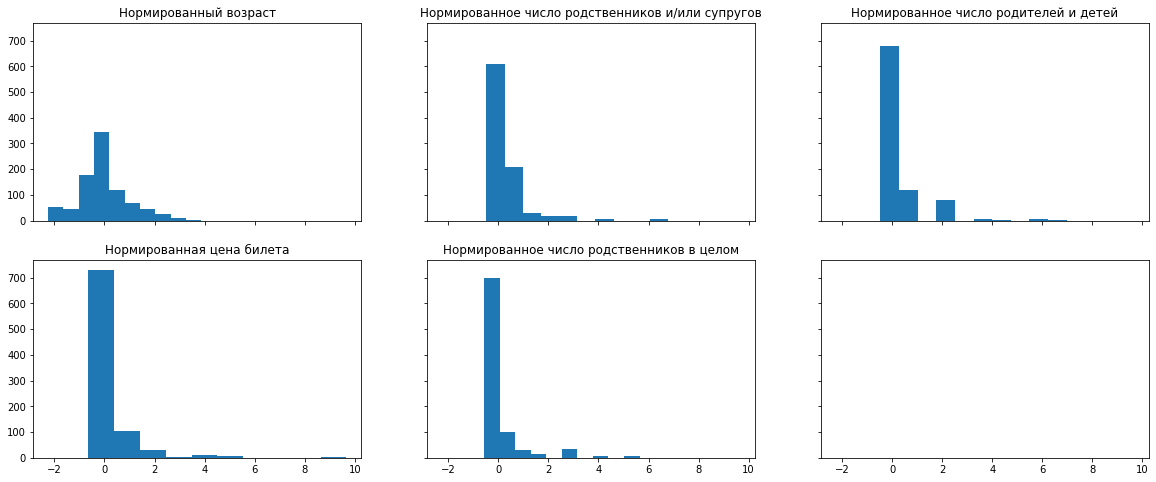

In [132]:
fig, ax = plt.subplots(2, 3, figsize=(20, 8), sharex = True, sharey = True)
ax[0,0].hist(data.Age_n)
ax[0,0].set_title("Нормированный возраст")
ax[0,1].hist(data.SibSp_n)
ax[0,1].set_title("Нормированное число родственников и/или супругов")
ax[0,2].hist(data.Parch_n)
ax[0,2].set_title("Нормированное число родителей и детей")
ax[1,0].hist(data.Fare_n)
ax[1,0].set_title("Нормированная цена билета")
ax[1,1].hist(data.Family_n)
ax[1,1].set_title("Нормированное число родственников в целом");


После нормировки мы видим, что все данные распределены в любом диапазоне (от ~-2 до 10) – так коэффиценты и "вес" фактора в целом будут оцениваться корректнее

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [133]:
#Да, это Sex и Embarked 

data["Sex"].replace("male", 1, inplace = True)
data["Sex"].replace("female", 0, inplace = True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,log(Fare),Age_n,SibSp_n,Parch_n,Fare_n,Family_n
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,2,1.981001,-0.597055,0.432793,-0.473674,-0.502445,0.059160
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,2,4.266662,0.634162,0.432793,-0.473674,0.786845,0.059160
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,1,2.070022,-0.289251,-0.474545,-0.473674,-0.488854,-0.560975
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,2,3.972177,0.403309,0.432793,-0.473674,0.420730,0.059160
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,1,2.085672,0.403309,-0.474545,-0.473674,-0.486337,-0.560975
5,6,0,3,"Moran, Mr. James",1,30.0,0,0,8.4583,3,1,2.135148,0.018554,-0.474545,-0.473674,-0.478116,-0.560975
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,1,1,3.948596,1.865379,-0.474545,-0.473674,0.395814,-0.560975
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,1,5,3.048088,-2.136076,2.247470,0.767630,-0.224083,1.919564
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,1,3,2.409941,-0.212299,-0.474545,2.008933,-0.424256,0.679295
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,2,2,3.403555,-1.212663,0.432793,-0.473674,-0.042956,0.059160


In [134]:
data["Embarked"].replace("S", 1, inplace = True)
data["Embarked"].replace("C", 2, inplace = True)
data["Embarked"].replace("Q", 3, inplace = True)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,log(Fare),Age_n,SibSp_n,Parch_n,Fare_n,Family_n
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,2,1.981001,-0.597055,0.432793,-0.473674,-0.502445,0.059160
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,2,4.266662,0.634162,0.432793,-0.473674,0.786845,0.059160
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,1,2.070022,-0.289251,-0.474545,-0.473674,-0.488854,-0.560975
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,2,3.972177,0.403309,0.432793,-0.473674,0.420730,0.059160
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,1,2.085672,0.403309,-0.474545,-0.473674,-0.486337,-0.560975


## Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь опять нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию plt.subplots. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры figsize, sharey, sharex функции plt.subplots. Также полезными могут оказаться параметры bins, normed функции plt.hist

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


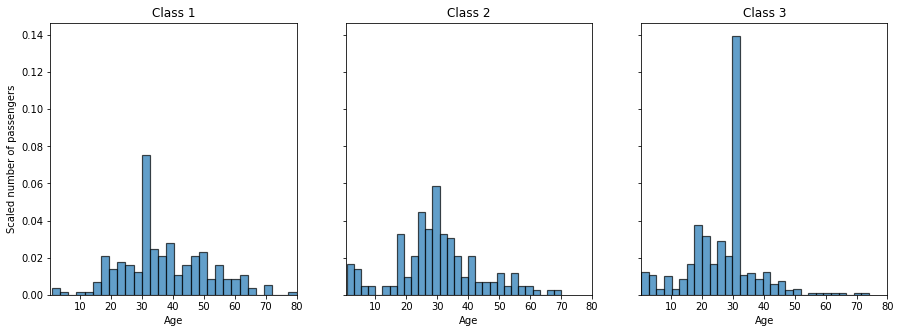

In [135]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey = True, sharex = True);
ax[0].hist(data[(data.Pclass == 1)].Age, bins = 30, normed = True, alpha = 0.7, linewidth = 1.2, edgecolor = "black");
ax[0].set_ylabel('Scaled number of passengers')
ax[0].set_xlabel('Age')
ax[0].set_title('Class 1')
plt.xticks(np.arange(0, 90, 10))
plt.margins(x = 0)

ax[1].hist(data[(data.Pclass == 2)].Age, bins = 30, normed = True, alpha = 0.7, linewidth = 1.2, edgecolor = "black");
ax[1].set_xlabel('Age')
ax[1].set_title('Class 2')

ax[2].hist(data[(data.Pclass == 3)].Age, bins = 30, normed = True, alpha = 0.7, linewidth = 1.2, edgecolor = "black");
ax[2].set_xlabel('Age')
ax[2].set_title('Class 3');

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. 

In [136]:
# В итоге ваш график должен получиться примерно таким:

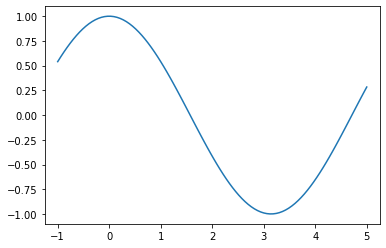

In [137]:
x = np.linspace(-1, 5, 100) 
plt.plot(x, np.cos(x))
plt.xlim(-1.25, 5.25);

### 27

Используя функцию из задания №10 по numpy (gen_data), отобразите на графике сгенерированную выборку, а также настоящую прямую из которой выборка была получена. Добавьте на этот график прямую, которая приближает выборку, обучив для этого простейшую линейную регрессию. Чтобы получить параметры данной прямой, можно выполнить следующий код:

        from sklearn.linear_model import LinearRegression as LR

        data_x, data_y = gen_data(...)
        regr = LR()
        regr.fit(data_x, data_y)
        k_learned, b_learned = regr.coef_, regr.intercept_

In [189]:
# В итоге ваш график должен получиться примерно таким:

In [190]:
from sklearn.linear_model import LinearRegression as LR

data_x, data_y  = gen_data((-2, 2), 3, 1.5, 40,  2.1)

regr = LR()
regr.fit(data_x.reshape(-1,1), data_y)
k_learned, b_learned = regr.coef_, regr.intercept_



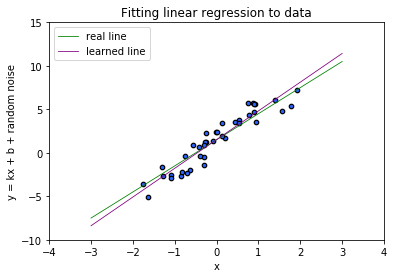

In [191]:
plt.scatter(data_x, data_y, s=20, color='#2962FF', edgecolor = "black", linewidth = 1.2)
plt.xlim(-4, 4)
plt.ylim(-10, 15)
plt.title("Fitting linear regression to data")
plt.xlabel("x")
plt.ylabel("y = kx + b + random noise")
gen = np.linspace(-3, 3, 40)
plt.plot(gen, 1.5 + 3*gen, "g", linewidth = 0.8, label = "real line")
plt.plot(gen, b_learned + k_learned*gen, linewidth  = 0.8, color = "purple",label = "learned line")
leg = plt.legend(loc = "upper left");